In [94]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [95]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [97]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Engineering

Parameters such as Glucose, BP, Skin thickness, insulin and BMI cannot be zero. Zero value in the dataset means incomplete data. Performed data engineering: converted these zero values to NaN, then removed them from the data. Alternatively, also tried converting these NaN values to the means of the respective columns. However, when comparing the correlation matrix, it appears that removing the data yields stronger correlations. So data should be dropped instead. 

In [98]:
df.loc[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [100]:
df.loc[(df['Glucose'].isnull()) | 
              (df['BloodPressure'].isnull())  |
              (df['SkinThickness'].isnull()) |
                (df['Insulin'].isnull()) |
                 (df['BMI'].isnull()) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [101]:
df.dropna (inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


## Feature Engineering

Pearson correlation to view correlation matrix. Since there is only 1 attribute that has a strong correlation with outcome, decided to keep all attributes instead. 
Subsequently, observed whether attributes are strongly correlated to each other. For grps of attributes that display a strong correlation to each other (>0.6), we compare which attribute has a higher correlation with the outcome. We keep this attribute, and discard the rest. 

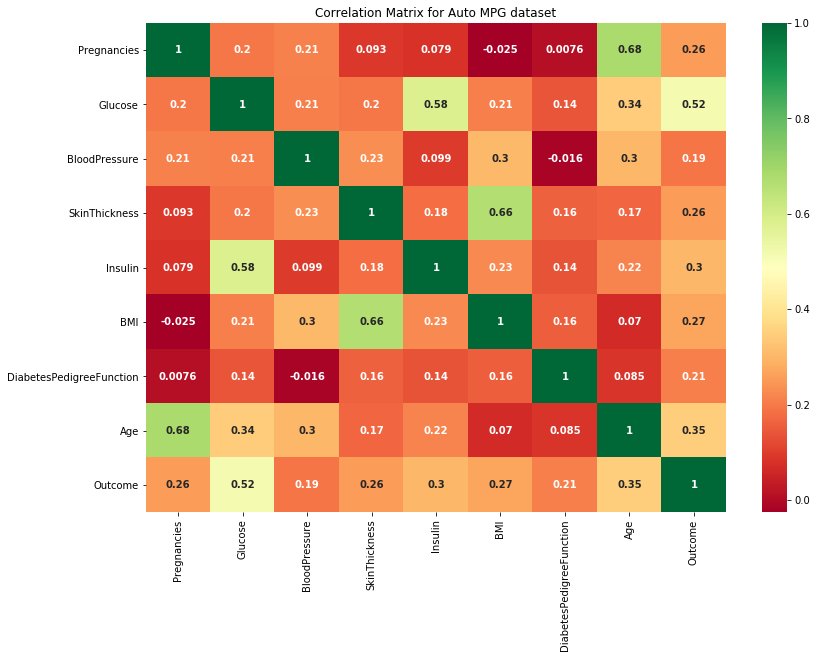

In [102]:
import seaborn as sns
corr_mat = df.corr()
plt.figure(figsize=(13,9))
ax = sns.heatmap(data=corr_mat, annot=True,
            cmap='RdYlGn', annot_kws={"weight": "bold"})
plt.title('Correlation Matrix for Auto MPG dataset')
plt.show()

In [103]:
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [104]:
target_column = corr_mat['Outcome']
target_column.drop(['Outcome'], inplace=True)

In [105]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [106]:

candidates = target_column[(target_column > 0) | (target_column < 0)]

print(candidates)
skip = []
accept = ['Outcome']
for colname in corr_mat.columns:
    if not colname in skip and not colname in accept:
        series = corr_mat[colname]
        print('colname: ', colname)
        # look for other features that are 
        # highly-correlated with the feature "colname"
        series = series[(series > 0.6)]
        print(series)
        
        # fetch the Pandas series from the 'candidates'
        # dataframe that only contains items found
        # in our 'series' variable (above)
        alike = candidates[series.index]
        #alike = df.loc[series.index]
        print('alike =\n', alike, '\n', sep='')

        # idxmax() to get the feature that is most 
        # correlated with "mpg" (our target). 
        # abs() to absolute the values because 
        # the features could be either positively
        # or negatively correlated to "mpg" (our target)
        top = alike.abs().idxmax()

        # accept the "top" feature
        accept += [top]

        # discard other highly-correlated features
        # with respect to the "top" feature 
        skip += set(alike.index) - set([top])

print('skip = ', skip)
print('selected =', accept)

Pregnancies                 0.256566
Glucose                     0.515703
BloodPressure               0.192673
SkinThickness               0.255936
Insulin                     0.301429
BMI                         0.270118
DiabetesPedigreeFunction    0.209330
Age                         0.350804
Name: Outcome, dtype: float64
colname:  Pregnancies
Pregnancies    1.000000
Age            0.679608
Name: Pregnancies, dtype: float64
alike =
Pregnancies    0.256566
Age            0.350804
Name: Outcome, dtype: float64

colname:  Glucose
Glucose    1.0
Name: Glucose, dtype: float64
alike =
Glucose    0.515703
Name: Outcome, dtype: float64

colname:  BloodPressure
BloodPressure    1.0
Name: BloodPressure, dtype: float64
alike =
BloodPressure    0.192673
Name: Outcome, dtype: float64

colname:  SkinThickness
SkinThickness    1.000000
BMI              0.664355
Name: SkinThickness, dtype: float64
alike =
SkinThickness    0.255936
BMI              0.270118
Name: Outcome, dtype: float64

colname:  In

In this step, we are excluding features that are already highly correlated with another feature. This helps to reduce dimensionality and minimize redundancy in the data used the train our models. df1 as shown below is the DataFrame that excludes these redundant features.

In [107]:
df1 = df[accept]
df1

,Outcome,Age,Glucose,BloodPressure,BMI,Insulin,DiabetesPedigreeFunction
3,0,21,89.0,66.0,28.1,94.0,0.167
4,1,33,137.0,40.0,43.1,168.0,2.288
6,1,26,78.0,50.0,31.0,88.0,0.248
8,1,53,197.0,70.0,30.5,543.0,0.158
13,1,59,189.0,60.0,30.1,846.0,0.398
...,...,...,...,...,...,...,...
753,1,26,181.0,88.0,43.3,510.0,0.222
755,1,37,128.0,88.0,36.5,110.0,1.057
760,0,22,88.0,58.0,28.4,16.0,0.766
763,0,63,101.0,76.0,32.9,180.0,0.171


In [108]:
#Re-arranging columns in order of the strength of correlation to the outcome. 
df = df.reindex(columns=['Outcome','Glucose','Age','Insulin','BMI','Pregnancies','SkinThickness','DiabetesPedigreeFunction',
                        'BloodPressure'])
df

,Outcome,Glucose,Age,Insulin,BMI,Pregnancies,SkinThickness,DiabetesPedigreeFunction,BloodPressure
3,0,89.0,21,94.0,28.1,1,23.0,0.167,66.0
4,1,137.0,33,168.0,43.1,0,35.0,2.288,40.0
6,1,78.0,26,88.0,31.0,3,32.0,0.248,50.0
8,1,197.0,53,543.0,30.5,2,45.0,0.158,70.0
13,1,189.0,59,846.0,30.1,1,23.0,0.398,60.0
...,...,...,...,...,...,...,...,...,...
753,1,181.0,26,510.0,43.3,0,44.0,0.222,88.0
755,1,128.0,37,110.0,36.5,1,39.0,1.057,88.0
760,0,88.0,22,16.0,28.4,2,26.0,0.766,58.0
763,0,101.0,63,180.0,32.9,10,48.0,0.171,76.0


In [109]:
df1 = df1.reindex(columns=['Outcome','Glucose','Age','Insulin','BMI','DiabetesPedigreeFunction',
                        'BloodPressure'])
df1

,Outcome,Glucose,Age,Insulin,BMI,DiabetesPedigreeFunction,BloodPressure
3,0,89.0,21,94.0,28.1,0.167,66.0
4,1,137.0,33,168.0,43.1,2.288,40.0
6,1,78.0,26,88.0,31.0,0.248,50.0
8,1,197.0,53,543.0,30.5,0.158,70.0
13,1,189.0,59,846.0,30.1,0.398,60.0
...,...,...,...,...,...,...,...
753,1,181.0,26,510.0,43.3,0.222,88.0
755,1,128.0,37,110.0,36.5,1.057,88.0
760,0,88.0,22,16.0,28.4,0.766,58.0
763,0,101.0,63,180.0,32.9,0.171,76.0


df: Original data ordered by their correlation to the outcome
df1: With removed attributes to reduce redundancy

## Logistic Regression 

### First Test: Training on all columns

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression(solver = 'lbfgs')

x = df.iloc[:, 1:]
y = df['Outcome']

x

,Glucose,Age,Insulin,BMI,Pregnancies,SkinThickness,DiabetesPedigreeFunction,BloodPressure
3,89.0,21,94.0,28.1,1,23.0,0.167,66.0
4,137.0,33,168.0,43.1,0,35.0,2.288,40.0
6,78.0,26,88.0,31.0,3,32.0,0.248,50.0
8,197.0,53,543.0,30.5,2,45.0,0.158,70.0
13,189.0,59,846.0,30.1,1,23.0,0.398,60.0
...,...,...,...,...,...,...,...,...
753,181.0,26,510.0,43.3,0,44.0,0.222,88.0
755,128.0,37,110.0,36.5,1,39.0,1.057,88.0
760,88.0,22,16.0,28.4,2,26.0,0.766,58.0
763,101.0,63,180.0,32.9,10,48.0,0.171,76.0


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
x_train.head()

,Glucose,Age,Insulin,BMI,Pregnancies,SkinThickness,DiabetesPedigreeFunction,BloodPressure
293,128.0,24,194.0,40.5,1,45.0,0.613,48.0
480,158.0,35,328.0,35.5,3,30.0,0.344,70.0
187,128.0,33,58.0,32.0,1,41.0,1.321,98.0
340,130.0,22,105.0,25.9,1,13.0,0.472,70.0
51,101.0,26,36.0,24.2,1,15.0,0.526,50.0


In [112]:
print(x_train.shape) # x_train and x_test shape should be 2D array
print(y_train.shape)
print(x_test.shape) # x_train and x_test shape should be 2D array
print(y_test.shape)

(294, 8)
(294,)
(98, 8)
(98,)


In [113]:
logReg.fit(x_train, y_train)

/Users/Sakuragi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
from sklearn.metrics import accuracy_score

y_pred = logReg.predict(x_test)
print(y_test)
print(y_pred)

296    1
545    1
142    0
723    0
644    0
      ..
306    1
742    0
169    0
662    1
356    1
Name: Outcome, Length: 98, dtype: int64
[0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0]


In [115]:
accuracy_score(y_test, y_pred)

0.8061224489795918

In [116]:
print(pd.crosstab(y_test, y_pred))

col_0     0   1
Outcome        
0        61   4
1        15  18


In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix (y_test, y_pred)

array([[61,  4],
       [15, 18]])

### Defining a Log Reg function 

In [119]:
def log_Reg(x, y):
    logReg = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    cols = x_train.columns
    print('Columns: ', cols)
    
    ts = time.time()
    logReg.fit(x_train, y_train)
    trainTime = time.time() - ts
    
    ts2 = time.time()
    y_pred = logReg.predict(x_test)
    predictTime = time.time() - ts2
    
    accScore = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ', accScore)
    print(confusion_matrix (y_test, y_pred))
    print('Training Time: ', trainTime)
    print('Prediction Time: ', predictTime)
    print('\n')
    return accScore, trainTime, predictTime

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x = df.iloc[:, 1:]
y = df['Outcome']

log_Reg(x, y)

Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies', 'SkinThickness',
       'DiabetesPedigreeFunction', 'BloodPressure'],
      dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.0744481086730957
Prediction Time:  0.0009090900421142578




(0.8061224489795918, 0.0744481086730957, 0.0009090900421142578)

## Observing how number of features affect model training

For the subsequent logistic regression sections, we observe how accuracy scores, training times and prediction times change as the number of features used increases. We first train the model using only the attribute which has the strongest correlation with the outcome, which is glucose, and recorded the relevant data. We subsequently added features in order of the strength of their correlation with the outcome, and observed how accuracy scores, training times and prediction times change with each feature added.

### Using Log Reg function to train different number of features added based on the strength of the correlation (no features excluded)

We used the dataset (df) that did not remove features that are highly correlated to each other.

Columns:  Index(['Glucose'], dtype='object')
Accuracy Score:  0.7653061224489796
[[61  4]
 [19 14]]
Training Time:  0.028332948684692383
Prediction Time:  0.001834869384765625


Columns:  Index(['Glucose', 'Age'], dtype='object')
Accuracy Score:  0.7755102040816326
[[59  6]
 [16 17]]
Training Time:  0.011404991149902344
Prediction Time:  0.0007669925689697266


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
Accuracy Score:  0.7755102040816326
[[59  6]
 [16 17]]
Training Time:  0.013247966766357422
Prediction Time:  0.0008111000061035156


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI'], dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.023005247116088867
Prediction Time:  0.0019669532775878906


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies'], dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.019604921340942383
Prediction Time:  0.0007960796356201172


Columns:  Index(

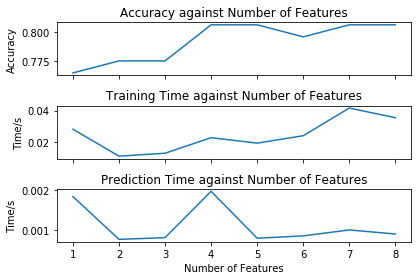

In [121]:
numFeatures = [1,2,3,4,5,6,7,8]
accuracyScores = []
trainingTimes = []
predictionTimes = []


for i in range(2,10):
    x = df.iloc[:, 1:i]
    y = df['Outcome']

    accScore, trainTime, predictTime = log_Reg(x, y)
    accuracyScores.append(accScore)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Features: ", numFeatures[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])



fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(numFeatures, accuracyScores)
ax1.set_title("Accuracy against Number of Features")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')


ax2.plot(numFeatures, trainingTimes)
ax2.set_title("Training Time against Number of Features")
ax2.set_ylabel("Time/s")
ax2.tick_params(axis='y')

ax3.plot(numFeatures, predictionTimes)
ax3.set_title("Prediction Time against Number of Features")
ax3.set_ylabel("Time/s")
ax3.set_xlabel("Number of Features")
ax3.tick_params(axis='y')

fig.tight_layout()
plt.show()

### Using Log Reg function to train different number of features added based on the strength of the correlation (features excluded)

In this section, we used the dataset (df1) that excludes number of pregnancies and skin thickness, as they were shown to be correlated to age and BMI respectively.

Columns:  Index(['Glucose'], dtype='object')
Accuracy Score:  0.7653061224489796
[[61  4]
 [19 14]]
Training Time:  0.014564275741577148
Prediction Time:  0.0016701221466064453


Columns:  Index(['Glucose', 'Age'], dtype='object')
Accuracy Score:  0.7755102040816326
[[59  6]
 [16 17]]
Training Time:  0.027677059173583984
Prediction Time:  0.0009300708770751953


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
Accuracy Score:  0.7755102040816326
[[59  6]
 [16 17]]
Training Time:  0.012032032012939453
Prediction Time:  0.0008540153503417969


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI'], dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.012452125549316406
Prediction Time:  0.000911712646484375


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.0203702449798584
Prediction Time:  0.0008199214935302734


Colum

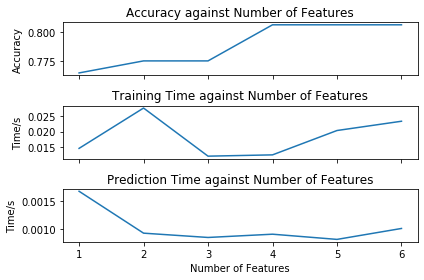

In [122]:
numFeatures = [1,2,3,4,5,6]
accuracyScores = []
trainingTimes = []
predictionTimes = []


for i in range(2,8):
    x = df1.iloc[:, 1:i]
    y = df1['Outcome']

    accScore, trainTime, predictTime = log_Reg(x, y)
    accuracyScores.append(accScore)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Features: ", numFeatures[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(numFeatures, accuracyScores)
ax1.set_title("Accuracy against Number of Features")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')


ax2.plot(numFeatures, trainingTimes)
ax2.set_title("Training Time against Number of Features")
ax2.set_ylabel("Time/s")
ax2.tick_params(axis='y')

ax3.plot(numFeatures, predictionTimes)
ax3.set_title("Prediction Time against Number of Features")
ax3.set_ylabel("Time/s")
ax3.set_xlabel("Number of Features")
ax3.tick_params(axis='y')

fig.tight_layout()
plt.show()

In [123]:
for i in range(2,8):
    x = df1.iloc[:, 1:i]
    y = df1['Outcome']

    log_Reg(x, y)

Columns:  Index(['Glucose'], dtype='object')
Accuracy Score:  0.7653061224489796
[[61  4]
 [19 14]]
Training Time:  0.016984224319458008
Prediction Time:  0.0023920536041259766


Columns:  Index(['Glucose', 'Age'], dtype='object')
Accuracy Score:  0.7755102040816326
[[59  6]
 [16 17]]
Training Time:  0.011160135269165039
Prediction Time:  0.0007948875427246094


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
Accuracy Score:  0.7755102040816326
[[59  6]
 [16 17]]
Training Time:  0.012392997741699219
Prediction Time:  0.0013110637664794922


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI'], dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.013786792755126953
Prediction Time:  0.0008890628814697266


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
Accuracy Score:  0.8061224489795918
[[61  4]
 [15 18]]
Training Time:  0.017685890197753906
Prediction Time:  0.0008971691131591797


Co

### Conclusion 

The highest accuracy score obtained is 0.806. While this can be accomplished by using all the attributes provided, removing certain features allow us to have the same accuracy score as well. The least number of features used to attain this score is 4, and the features are Glucose, Age, Insulin, BMI. If we continue adding more features after this, the maximum accuracy score obtained remains the same, and adding certain features may even lead to a reduction of accuracy score. From this, we can infer that the remaining attributes do not aid in improving classification of the outcome. 

<br>
From the confusion matrices as shown above, we can see that although our model shows good sensitivity, the specificity is low. 

<br>

We observed how the time taken to train the classification models, which we labelled as training times in the above graphs, changes with the number of features used. As the number of features increases from 1 to 2, there is initially a decrease in training times. Subsequently, an increase in the number of features used will lead to an increase in training times. 

<br>

We also visualized how prediction times change with number of features in the graphs above. Prediction times generally fluctuate with the number of features with no apparent trend.  

## KNN Classification Model

In [124]:
#Create a k NumPy array so you can iterate through it to see different accuracy scores for differing k values

k_array = np.arange(1, 25, 2)

k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Trial with all features (no exclusion)

In [126]:
x = df.iloc[:, 1:]
y = df['Outcome']

x

,Glucose,Age,Insulin,BMI,Pregnancies,SkinThickness,DiabetesPedigreeFunction,BloodPressure
3,89.0,21,94.0,28.1,1,23.0,0.167,66.0
4,137.0,33,168.0,43.1,0,35.0,2.288,40.0
6,78.0,26,88.0,31.0,3,32.0,0.248,50.0
8,197.0,53,543.0,30.5,2,45.0,0.158,70.0
13,189.0,59,846.0,30.1,1,23.0,0.398,60.0
...,...,...,...,...,...,...,...,...
753,181.0,26,510.0,43.3,0,44.0,0.222,88.0
755,128.0,37,110.0,36.5,1,39.0,1.057,88.0
760,88.0,22,16.0,28.4,2,26.0,0.766,58.0
763,101.0,63,180.0,32.9,10,48.0,0.171,76.0


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)


In [128]:
from sklearn.metrics import accuracy_score
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(x_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(x_test))
    print(k)
    print(ac)

1
0.673469387755102
3
0.6836734693877551
5
0.7040816326530612
7
0.7142857142857143
9
0.7346938775510204
11
0.7346938775510204
13
0.7346938775510204
15
0.7346938775510204
17
0.7346938775510204
19
0.7244897959183674
21
0.7244897959183674
23
0.7244897959183674


### Trial with all features (redundant ones excluded)

In [129]:
x1 = df1.iloc[:, 1:]
y1 = df1['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, random_state = 42)

from sklearn.metrics import accuracy_score
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(x_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(x_test))
    print(k)
    print(ac)

1
0.6938775510204082
3
0.6836734693877551
5
0.6836734693877551
7
0.6836734693877551
9
0.7142857142857143
11
0.7244897959183674
13
0.7346938775510204
15
0.7142857142857143
17
0.7244897959183674
19
0.7346938775510204
21
0.7244897959183674
23
0.7142857142857143


### Defining a KNN function

In [130]:
def KNN(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
    
    cols = x_train.columns
    print('Columns: ', cols)
    
    kmin = 0
    acmax = 0
    conmatmax = 0
    corrTrainTime = 0
    corrPredictTime = 0
    
    for k in k_array:

        knn_ex = KNeighborsClassifier(n_neighbors = k)
        
        ts = time.time()
        knn_ex.fit(x_train, y_train)
        trainTime = time.time() - ts
        
        ts1 = time.time()
        ac = accuracy_score(y_test, knn_ex.predict(x_test))
        predictTime = time.time() - ts1
        
        conmat = confusion_matrix (y_test, y_pred)
        
        if ac > acmax:
            acmax = ac
            kmin = k
            conmatmax = conmat
            corrTrainTime = trainTime
            corrPredictTime = predictTime

    print(kmin)
    print(acmax)
    print(conmatmax)
    print('\n')
    
    return acmax, kmin, corrTrainTime, corrPredictTime

### Using KNN function for different number of features (redundant excluded)

In this section, we used the dataset (df1) that excludes number of pregnancies and skin thickness, as they were shown to be correlated to age and BMI respectively.

Columns:  Index(['Glucose'], dtype='object')
1
0.7551020408163265
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age'], dtype='object')
13
0.7653061224489796
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
19
0.7346938775510204
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI'], dtype='object')
17
0.7244897959183674
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
17
0.7244897959183674
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'BloodPressure'],
      dtype='object')
13
0.7346938775510204
[[51 15]
 [25  7]]


Maximum Accuracy Score:  0.7653061224489796
Corresponding Number of Features:  2
Corresponding k Value:  13
Corresponding Training Time:  0.001814126968383789
Corresponding Prediction Time:  0.0060880184173583984


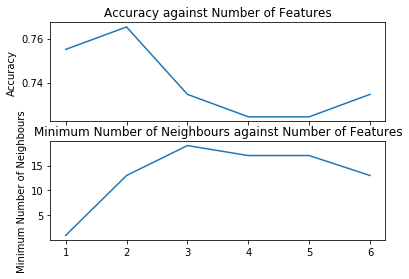

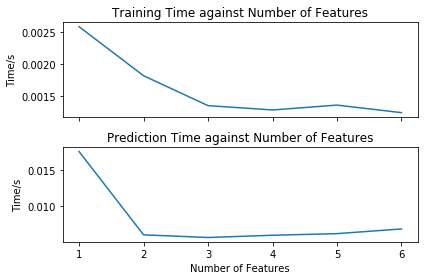

In [131]:
numFeatures = [1,2,3,4,5,6]
accuracyScores = []
kMins = []
trainingTimes = []
predictionTimes = []

for i in range(2,8):
    x = df1.iloc[:, 1:i]
    y = df1['Outcome']
    
    accScore, kmin, trainTime, predictTime = KNN(x, y)
    accuracyScores.append(accScore)
    kMins.append(kmin)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Features: ", numFeatures[accuracyScores.index(max(accuracyScores))])
print("Corresponding k Value: ", kMins[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(numFeatures, accuracyScores)
ax1.set_title("Accuracy against Number of Features")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(numFeatures, kMins)
ax2.set_title("Minimum Number of Neighbours against Number of Features")
ax2.set_ylabel("Minimum Number of Neighbours")
ax2.tick_params(axis='y')

fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax3.plot(numFeatures, trainingTimes)
ax3.set_title("Training Time against Number of Features")
ax3.set_ylabel("Time/s")
ax3.tick_params(axis='y')

ax4.plot(numFeatures, predictionTimes)
ax4.set_title("Prediction Time against Number of Features")
ax4.set_ylabel("Time/s")
ax4.set_xlabel("Number of Features")
ax4.tick_params(axis='y')

plt.tight_layout()
plt.show()

### Using function for diff no of features (no exclusion)

We used the dataset (df) that did not remove features that are highly correlated to each other.

Columns:  Index(['Glucose'], dtype='object')
1
0.7551020408163265
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age'], dtype='object')
13
0.7653061224489796
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
19
0.7346938775510204
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI'], dtype='object')
17
0.7244897959183674
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies'], dtype='object')
17
0.7244897959183674
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies', 'SkinThickness'], dtype='object')
13
0.7346938775510204
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies', 'SkinThickness',
       'DiabetesPedigreeFunction'],
      dtype='object')
13
0.7346938775510204
[[51 15]
 [25  7]]


Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies', 'SkinThickness',
       'DiabetesPedigreeFunction', 'BloodPressure'],
  

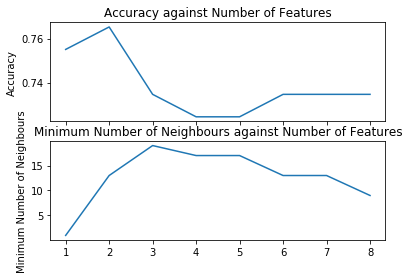

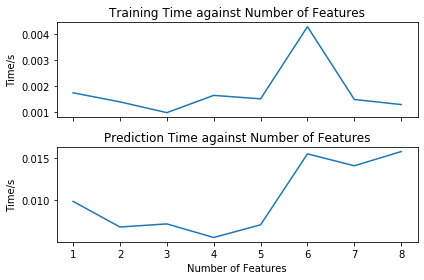

In [132]:
numFeatures = [1,2,3,4,5,6,7,8]
accuracyScores = []
kMins = []
trainingTimes = []
predictionTimes = []

for i in range(2,10):
    x = df.iloc[:, 1:i]
    y = df['Outcome']
    
    accScore, kmin, trainTime, predictTime = KNN(x, y)
    accuracyScores.append(accScore)
    kMins.append(kmin)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Features: ", numFeatures[accuracyScores.index(max(accuracyScores))])
print("Corresponding k Value: ", kMins[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(numFeatures, accuracyScores)
ax1.set_title("Accuracy against Number of Features")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(numFeatures, kMins)
ax2.set_title("Minimum Number of Neighbours against Number of Features")
ax2.set_ylabel("Minimum Number of Neighbours")
ax2.tick_params(axis='y')

fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax3.plot(numFeatures, trainingTimes)
ax3.set_title("Training Time against Number of Features")
ax3.set_ylabel("Time/s")
ax3.tick_params(axis='y')

ax4.plot(numFeatures, predictionTimes)
ax4.set_title("Prediction Time against Number of Features")
ax4.set_ylabel("Time/s")
ax4.set_xlabel("Number of Features")
ax4.tick_params(axis='y')

plt.tight_layout()
plt.show()

### Conclusions

The maximum accuracy score of 0.765 is obtained when model considers only 2 features: glucose concentration and age. The corresponding k that yields the highest accuracy score is 13. From the confusion matrices as shown above, we can see that although our models show good sensitivity, the specificity is low. 

<br>
We first trained the model using only the feature that showed the strongest correlation with the outcome, which is glucose concentration, and recorded the maximum accuracy scores and the corresponding k value obtained from that model. Subsequently, we added more features in descending order of their strength of correlation to the outcome, and compared the maximum accuracy score and corresponding k value obtained from each of the models trained. We observed that accuracy score was the greatest at 0.765 when the 2 features with the strongest correlation to outcome, glucose and age were used to train the model. A further increase in the number of features added leads to the accuracy scores stagnating around 0.73. These trends can be seen from the graphs in the above 2 sections. 

<br><br>
We also observed that as the number of features increases, the k number of neighbours used in the model that yielded the greatest accuracy initially increased. It peaks when 3 features were used at k = 19. As the number of features used increases beyond 3, the k number of neighbours that yield maximum accuracy decreases.

<br><br>
We observed the fluctuations in training and prediction times that correspond to the model that yielded the highest accuracy for each combination of features used for both df and df1. There does not seem to be any apparent trend observed.

### Observing how accuracy and training/ prediction times change with Number of Neighbours

From the previous analyses, it was found that maximum accuracy was obtained when the model only considers glucose concentration and age. Thus, for this part of the analysis, we shall only use glucose concentration and age to train the model. 

    Glucose  Age
3      89.0   21
4     137.0   33
6      78.0   26
8     197.0   53
13    189.0   59
Maximum Accuracy Score:  0.7653061224489796
Corresponding Number of Neighbours:  13
Corresponding Training Time:  0.0014960765838623047
Corresponding Prediction Time:  0.006173133850097656


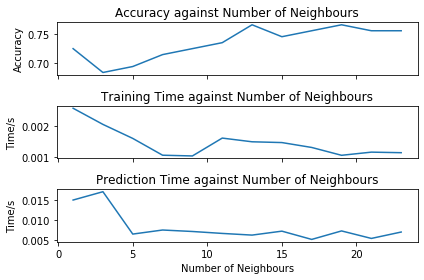

In [133]:
kNum = []
accuracyScores = []
trainingTimes = []
predictionTimes = []


x = df.iloc[:, 1:3]
y = df['Outcome']
print(x.head())    

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

for k in k_array:

    knn_ex = KNeighborsClassifier(n_neighbors = k)
        
    ts = time.time()
    knn_ex.fit(x_train, y_train)
    trainTime = time.time() - ts
        
    ts1 = time.time()
    ac = accuracy_score(y_test, knn_ex.predict(x_test))
    predictTime = time.time() - ts1

    accuracyScores.append(ac)
    kNum.append(k)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Neighbours: ", kNum[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(kNum, accuracyScores)
ax1.set_title("Accuracy against Number of Neighbours")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(kNum, trainingTimes)
ax2.set_title("Training Time against Number of Neighbours")
ax2.set_ylabel("Time/s")
ax2.tick_params(axis='y')

ax3.plot(kNum, predictionTimes)
ax3.set_title("Prediction Time against Number of Neighbours")
ax3.set_ylabel("Time/s")
ax3.set_xlabel("Number of Neighbours")
ax3.tick_params(axis='y')

plt.tight_layout()
plt.show()

### Conclusions

From the above graphs, we can see that accuracy initially increases as the number of neighbours increases. The accuracy score peaks at 0.765 when number of neighbours is 13, and plateaus as the number of neighbours increases further. 

<br><br>
Moreover, we also observed that training times generally decrease steeply as number of neighbours increases from 1 to 3. The training times then plateau at a minimum as number of neighbours increase further. 

<br><br>
Last, we observed that prediction time generally decreases as number of neighbours increase from 1 to 11. The prediction times will then fluctuate around 0.0055s as number of neighbours increase further. 

## Decision Tree

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from graphviz import Source

### Trial using all features

In [135]:
x = df.iloc[:, 1:]
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
x_train.head()

,Glucose,Age,Insulin,BMI,Pregnancies,SkinThickness,DiabetesPedigreeFunction,BloodPressure
519,129.0,60,326.0,19.6,6,7.0,0.582,90.0
35,103.0,33,192.0,24.0,4,33.0,0.966,60.0
137,93.0,22,92.0,28.7,0,25.0,0.532,60.0
316,99.0,30,64.0,19.3,3,11.0,0.284,80.0
18,103.0,33,83.0,43.3,1,38.0,0.183,30.0


In [136]:
dt = DecisionTreeClassifier(random_state = 42) 
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [137]:
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7448979591836735

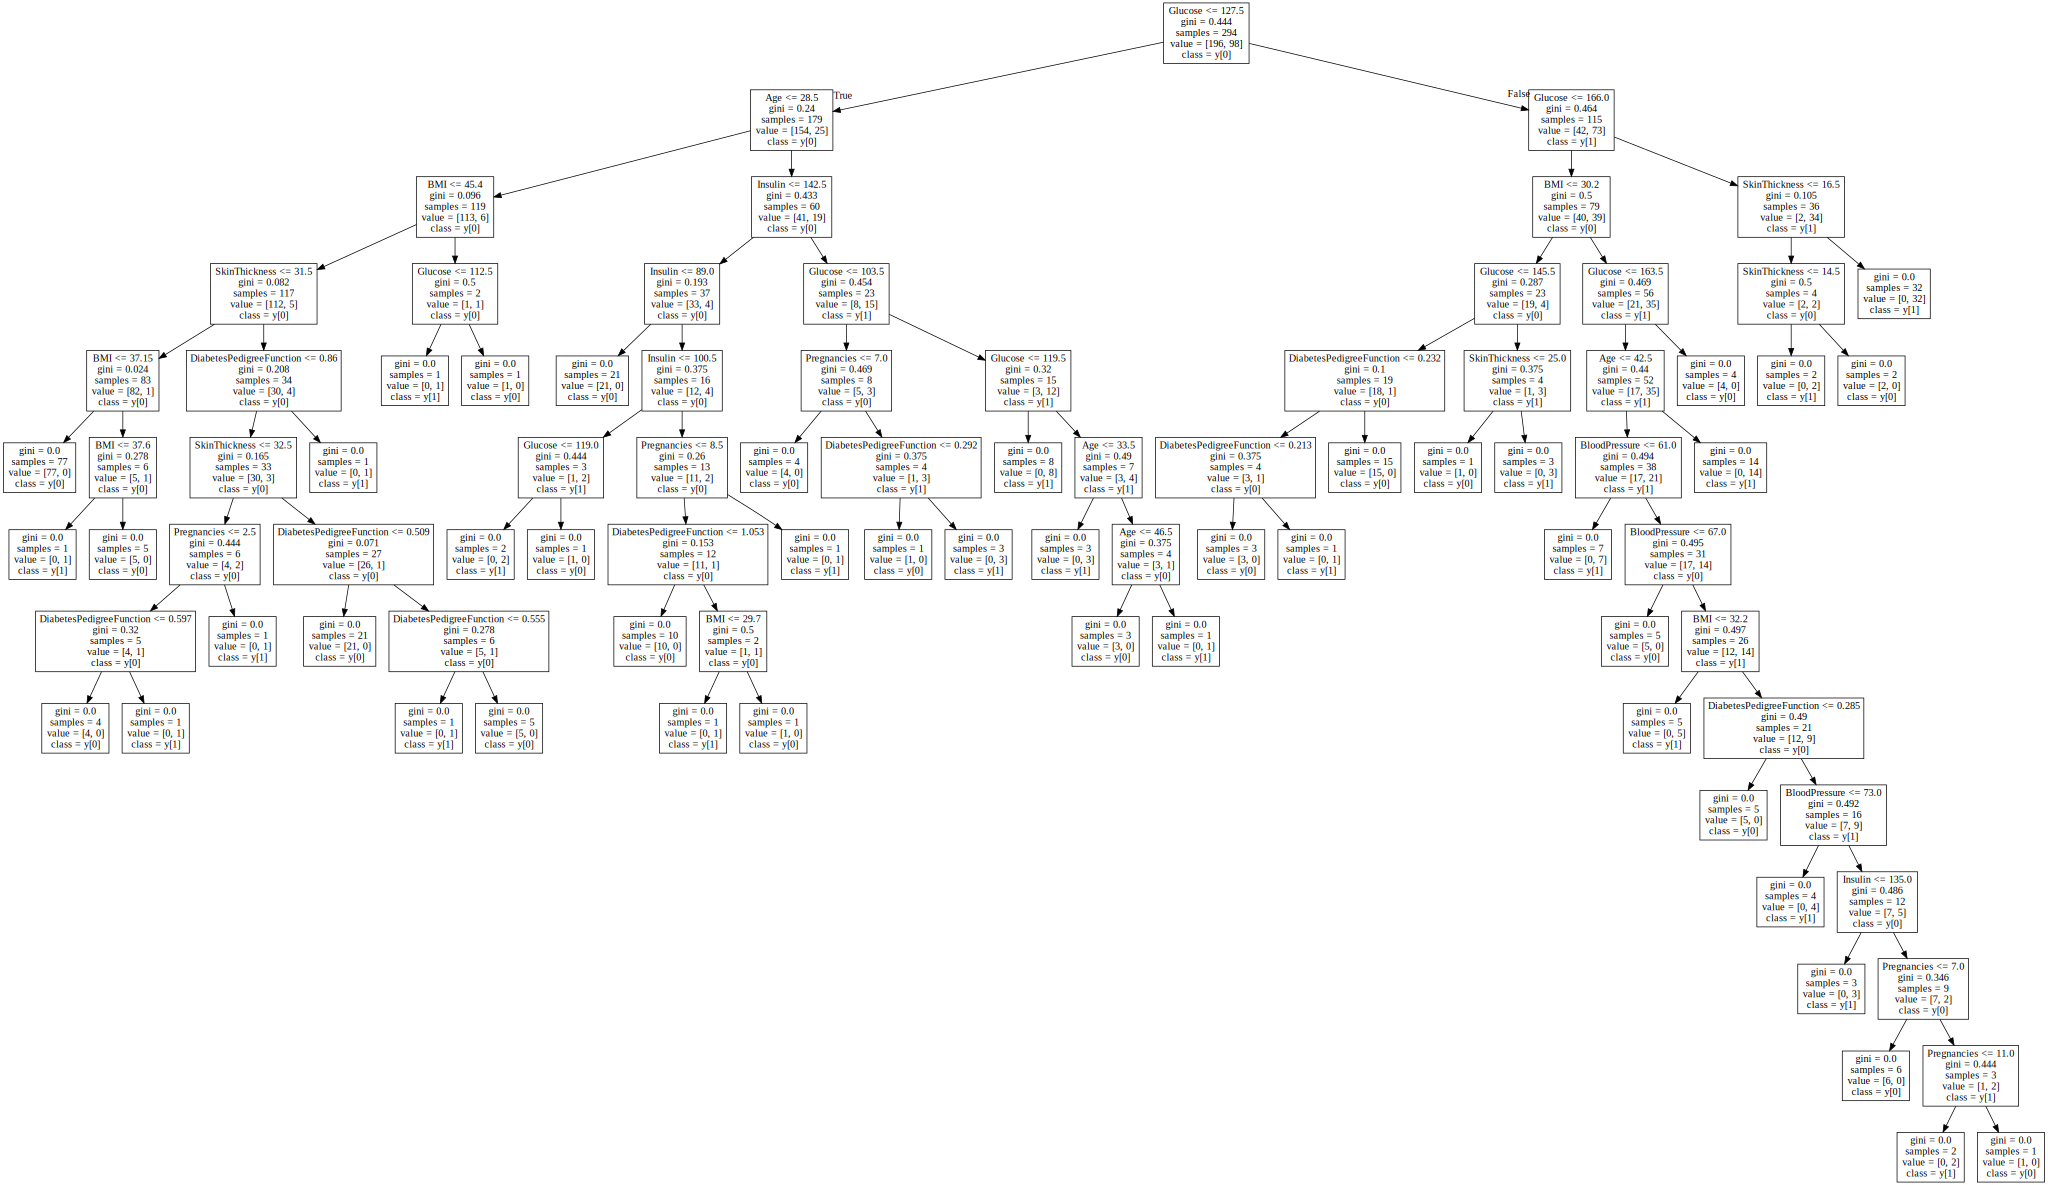

In [138]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns))

### Observing how accuracy scores change with max_Depth and max_leaf_nodes

In [139]:
def decTreeScore2(crit = 'gini',  maxDepth = None, minSamples = 1, minSplit = 2, max_leaf_nodes=None):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42, max_leaf_nodes = max_leaf_nodes)
    
    ts = time.time()
    dect.fit(x_train, y_train)
    trainTime = time.time() - ts
    
    ts1 = time.time()
    accuracy = accuracy_score(y_test, dect.predict(x_test))
    predictTime = time.time() - ts1
    
    print(accuracy)
    return accuracy, trainTime, predictTime

#### Maximum Depth

1
0.7346938775510204
2
0.7040816326530612
3
0.7448979591836735
4
0.7448979591836735
5
0.7244897959183674
6
0.7244897959183674
7
0.7142857142857143
8
0.7040816326530612
9
0.7551020408163265
10
0.7142857142857143
11
0.7346938775510204
12
0.7448979591836735
13
0.7448979591836735
14
0.7448979591836735
Maximum Accuracy Score:  0.7551020408163265
Corresponding Maximum Depth:  9
Corresponding Training Time:  0.002317667007446289
Corresponding Prediction Time:  0.00115203857421875


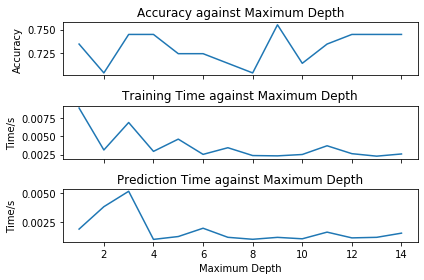

In [140]:
max_depths = []
accuracyScores = []
trainTimes = []
predictTimes = []

for i in np.arange(1, 15, 1):
    print(i)
    accuracy, traintime, predicttime = decTreeScore2(maxDepth = i)
    max_depths.append(i)
    accuracyScores.append(accuracy)
    trainTimes.append(traintime)
    predictTimes.append(predicttime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Maximum Depth: ", max_depths[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(max_depths, accuracyScores)
ax1.set_title("Accuracy against Maximum Depth")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(max_depths, trainTimes)
ax2.set_title("Training Time against Maximum Depth")
ax2.set_ylabel("Time/s")
ax2.tick_params(axis='y')

ax3.plot(max_depths, predictTimes)
ax3.set_title("Prediction Time against Maximum Depth")
ax3.set_ylabel("Time/s")
ax3.set_xlabel("Maximum Depth")
ax3.tick_params(axis='y')

plt.tight_layout()
plt.show()

#### Maximum Leaf Nodes

2
0.7346938775510204
3
0.7040816326530612
4
0.7346938775510204
5
0.7346938775510204
6
0.7448979591836735
7
0.7448979591836735
8
0.7448979591836735
9
0.7244897959183674
10
0.7346938775510204
11
0.7448979591836735
12
0.7448979591836735
13
0.7653061224489796
14
0.7448979591836735
Maximum Accuracy Score:  0.7653061224489796
Corresponding Maximum Leaf Nodes:  13
Corresponding Training Time:  0.0018508434295654297
Corresponding Prediction Time:  0.0010213851928710938


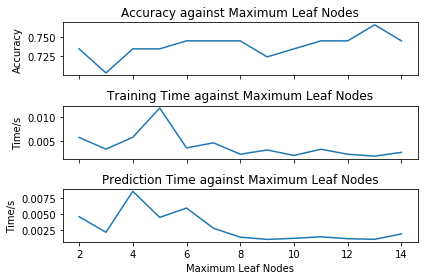

In [141]:
max_LN = []
accuracyScores = []
trainTimes = []
predictTimes = []

for i in np.arange(2, 15, 1):
    print(i)
    accuracy, traintime, predicttime = decTreeScore2(max_leaf_nodes = i)
    
    max_LN.append(i)
    accuracyScores.append(accuracy)
    trainTimes.append(traintime)
    predictTimes.append(predicttime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Maximum Leaf Nodes: ", max_LN[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(max_LN, accuracyScores)
ax1.set_title("Accuracy against Maximum Leaf Nodes")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(max_LN, trainTimes)
ax2.set_title("Training Time against Maximum Leaf Nodes")
ax2.set_ylabel("Time/s")
ax2.tick_params(axis='y')

ax3.plot(max_LN, predictTimes)
ax3.set_title("Prediction Time against Maximum Leaf Nodes")
ax3.set_ylabel("Time/s")
ax3.set_xlabel("Maximum Leaf Nodes")
ax3.tick_params(axis='y')

plt.tight_layout()
plt.show()

### Observations

When all features (no redundancy exclusion) are used to train the model, a maximum depth of 9 yields the highest accuracy of 0.755 when we adjusted maximum depth value. Setting the maximum leaf nodes to 13 yields the highest accuracy of 0.765 when we adjusted the number of maximum leaf nodes.
<br><br>
Accuracy scores, training times and prediction times fluctuate with maximum depth with no apparent trend. 
<br><br>
Accuracy scores generally increase as the maximum leaf nodes increase, while training times and prediction times generally decreases as maximum leaf nodes increase. 

## Observing how accuracy scores change with number of features used to train the model

Similarly as before, we first train the model using glucose as the only feature as it is the feature that has the strongest correlation with the outcome. We subsequently add features in order of the strength of the correlation with the outcome, and evaluated the accuracy scores, training times and prediction times for the models. 

### Defining a Decision Tree function

Since we observed that maximum depth affects the accuracy scores, we coded our function to train the models at different depths. Our function returns the maximum accuracy score obtained and the corresponding maximum depth used in our model. 

In [142]:
def decTree(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
    cols = x_train.columns
    print('Columns: ', cols)
    
    accmax = 0
    maxdep = 0
    corrtraintime = 0
    corrpredicttime = 0
    
    for i in np.arange(1, 15, 1):
        print(i)
        
        dect = DecisionTreeClassifier(max_depth = i, random_state= 42)
        
        ts = time.time()
        dect.fit(x_train, y_train)
        trainTime = time.time() - ts
        
        ts1 = time.time()
        accuracy = accuracy_score(y_test, dect.predict(x_test))
        predictTime = time.time() - ts
        
        print(accuracy)
        if accuracy > accmax:
            accmax = accuracy
            maxdep = i
            corrtraintime = trainTime
            corrpredicttime = predictTime
    
    print("Max Accuracy: ", accmax)
    print("Max Depth: ", maxdep)
    print('\n')
    
    return accmax, maxdep, corrtraintime, corrpredicttime

In [143]:
x = df.iloc[:, 1:]
y = df['Outcome']

decTree(x,y)



Columns:  Index(['Glucose', 'Age', 'Insulin', 'BMI', 'Pregnancies', 'SkinThickness',
       'DiabetesPedigreeFunction', 'BloodPressure'],
      dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7448979591836735
4
0.7448979591836735
5
0.7244897959183674
6
0.7244897959183674
7
0.7142857142857143
8
0.7040816326530612
9
0.7551020408163265
10
0.7142857142857143
11
0.7346938775510204
12
0.7448979591836735
13
0.7448979591836735
14
0.7448979591836735
Max Accuracy:  0.7551020408163265
Max Depth:  9




(0.7551020408163265, 9, 0.0033800601959228516, 0.004525184631347656)

### Using function for diff no of features (no exclusion)

We used the dataset (df) that did not remove features that are highly correlated to each other.

Columns:  Index(['Glucose'], dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7244897959183674
4
0.7244897959183674
5
0.7551020408163265
6
0.7142857142857143
7
0.7244897959183674
8
0.7857142857142857
9
0.7551020408163265
10
0.8061224489795918
11
0.7653061224489796
12
0.7857142857142857
13
0.7959183673469388
14
0.7959183673469388
Max Accuracy:  0.8061224489795918
Max Depth:  10


Columns:  Index(['Glucose', 'Age'], dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7857142857142857
4
0.7653061224489796
5
0.7653061224489796
6
0.7448979591836735
7
0.7448979591836735
8
0.7244897959183674
9
0.7142857142857143
10
0.7142857142857143
11
0.7346938775510204
12
0.7346938775510204
13
0.7244897959183674
14
0.7346938775510204
Max Accuracy:  0.7857142857142857
Max Depth:  3


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7959183673469388
4
0.7755102040816326
5
0.7755102040816326
6
0.7857142857142857
7
0.76530612244

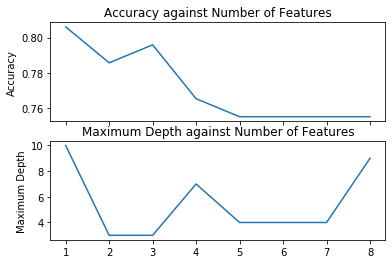

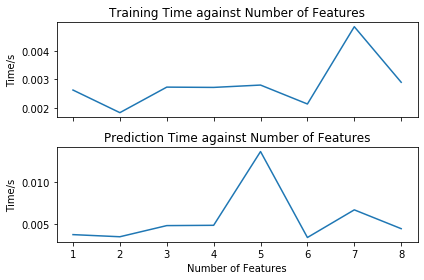

In [144]:
numFeatures = [1,2,3,4,5,6,7,8]
accuracyScores = []
maxDepths = []
trainingTimes = []
predictionTimes = []

for i in range(2,10):
    x = df.iloc[:, 1:i]
    y = df['Outcome']

    accScore, maxdep, trainTime, predictTime = decTree(x, y)
    
    accuracyScores.append(accScore)
    maxDepths.append(maxdep)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Features: ", numFeatures[accuracyScores.index(max(accuracyScores))])
print("Corresponding Maximum Depth: ",maxDepths[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(numFeatures, accuracyScores)
ax1.set_title("Accuracy against Number of Features")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(numFeatures, maxDepths)
ax2.set_title("Maximum Depth against Number of Features")
ax2.set_ylabel("Maximum Depth")
ax2.tick_params(axis='y')

fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax3.plot(numFeatures, trainingTimes)
ax3.set_title("Training Time against Number of Features")
ax3.set_ylabel("Time/s")
ax3.tick_params(axis='y')

ax4.plot(numFeatures, predictionTimes)
ax4.set_title("Prediction Time against Number of Features")
ax4.set_ylabel("Time/s")
ax4.set_xlabel("Number of Features")
ax4.tick_params(axis='y')

plt.tight_layout()
plt.show()

### Using function for diff no of features (with exclusion)

We used the dataset (df1) that did removed features skin thickness and number of pregnancies that are highly correlated to BMI and age respectively.

Columns:  Index(['Glucose'], dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7244897959183674
4
0.7244897959183674
5
0.7551020408163265
6
0.7142857142857143
7
0.7244897959183674
8
0.7857142857142857
9
0.7551020408163265
10
0.8061224489795918
11
0.7653061224489796
12
0.7857142857142857
13
0.7959183673469388
14
0.7959183673469388
Max Accuracy:  0.8061224489795918
Max Depth:  10


Columns:  Index(['Glucose', 'Age'], dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7857142857142857
4
0.7653061224489796
5
0.7653061224489796
6
0.7448979591836735
7
0.7448979591836735
8
0.7244897959183674
9
0.7142857142857143
10
0.7142857142857143
11
0.7346938775510204
12
0.7346938775510204
13
0.7244897959183674
14
0.7346938775510204
Max Accuracy:  0.7857142857142857
Max Depth:  3


Columns:  Index(['Glucose', 'Age', 'Insulin'], dtype='object')
1
0.7346938775510204
2
0.7040816326530612
3
0.7959183673469388
4
0.7755102040816326
5
0.7755102040816326
6
0.7857142857142857
7
0.76530612244

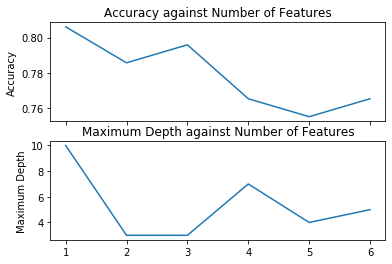

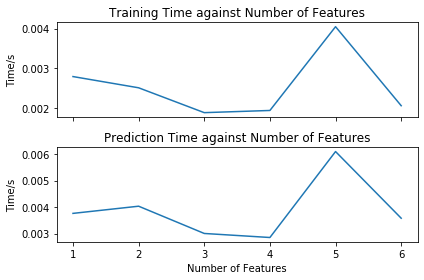

In [145]:
for i in range(2,8):
    x = df1.iloc[:, 1:i]
    y = df1['Outcome']

numFeatures = [1,2,3,4,5,6]
accuracyScores = []
maxDepths = []
trainingTimes = []
predictionTimes = []

for i in range(2,8):
    x = df1.iloc[:, 1:i]
    y = df1['Outcome']

    accScore, maxdep, trainTime, predictTime = decTree(x, y)
    
    accuracyScores.append(accScore)
    maxDepths.append(maxdep)
    trainingTimes.append(trainTime)
    predictionTimes.append(predictTime)
    
print("Maximum Accuracy Score: ", max(accuracyScores))
print("Corresponding Number of Features: ", numFeatures[accuracyScores.index(max(accuracyScores))])
print("Corresponding Maximum Depth: ",maxDepths[accuracyScores.index(max(accuracyScores))])
print("Corresponding Training Time: ",trainingTimes[accuracyScores.index(max(accuracyScores))])
print("Corresponding Prediction Time: ",predictionTimes[accuracyScores.index(max(accuracyScores))])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(numFeatures, accuracyScores)
ax1.set_title("Accuracy against Number of Features")
ax1.set_ylabel("Accuracy")
ax1.tick_params(axis='y')

ax2.plot(numFeatures, maxDepths)
ax2.set_title("Maximum Depth against Number of Features")
ax2.set_ylabel("Maximum Depth")
ax2.tick_params(axis='y')

fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax3.plot(numFeatures, trainingTimes)
ax3.set_title("Training Time against Number of Features")
ax3.set_ylabel("Time/s")
ax3.tick_params(axis='y')

ax4.plot(numFeatures, predictionTimes)
ax4.set_title("Prediction Time against Number of Features")
ax4.set_ylabel("Time/s")
ax4.set_xlabel("Number of Features")
ax4.tick_params(axis='y')

plt.tight_layout()
plt.show()

### Observations

The maximum accuracy score of 0.806 is obtained when only 1 feature, glucose, is used to train the model. The corresponding maximum depth that yields this accuracy is 10. 
<br><br>
We observed that as number of features included increases, accuracy scores decrease until it reaches a minimum of 0.755 when five features were used. Accuracy scores plateau at this minimum as number of features increase.
<br><br>
The maximum depth that yields the greatest accuracy is initially the greatest at 10 when only 1 feature was used to train the classification model. Subsequently as more features were added, maximum depth required to get the greatest accuracy decreases and fluctuates at about maximum depth = 5.
<br><br>
For both of the above sections, the training time and prediction times that correspond to the model that yields the best accuracy for each set of features used fluctuates with no apparent trend as the number of features increases.

### Observing decision tree and confusion matrix at maximum accuracy

In [146]:
x = df.iloc[:, 1:2]
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
x_train.head()

,Glucose
519,129.0
35,103.0
137,93.0
316,99.0
18,103.0


In [147]:
dt = DecisionTreeClassifier(random_state = 42, max_depth = 10) 
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [148]:
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.8061224489795918

In [149]:
print(confusion_matrix (y_test, y_pred))

[[63  3]
 [16 16]]


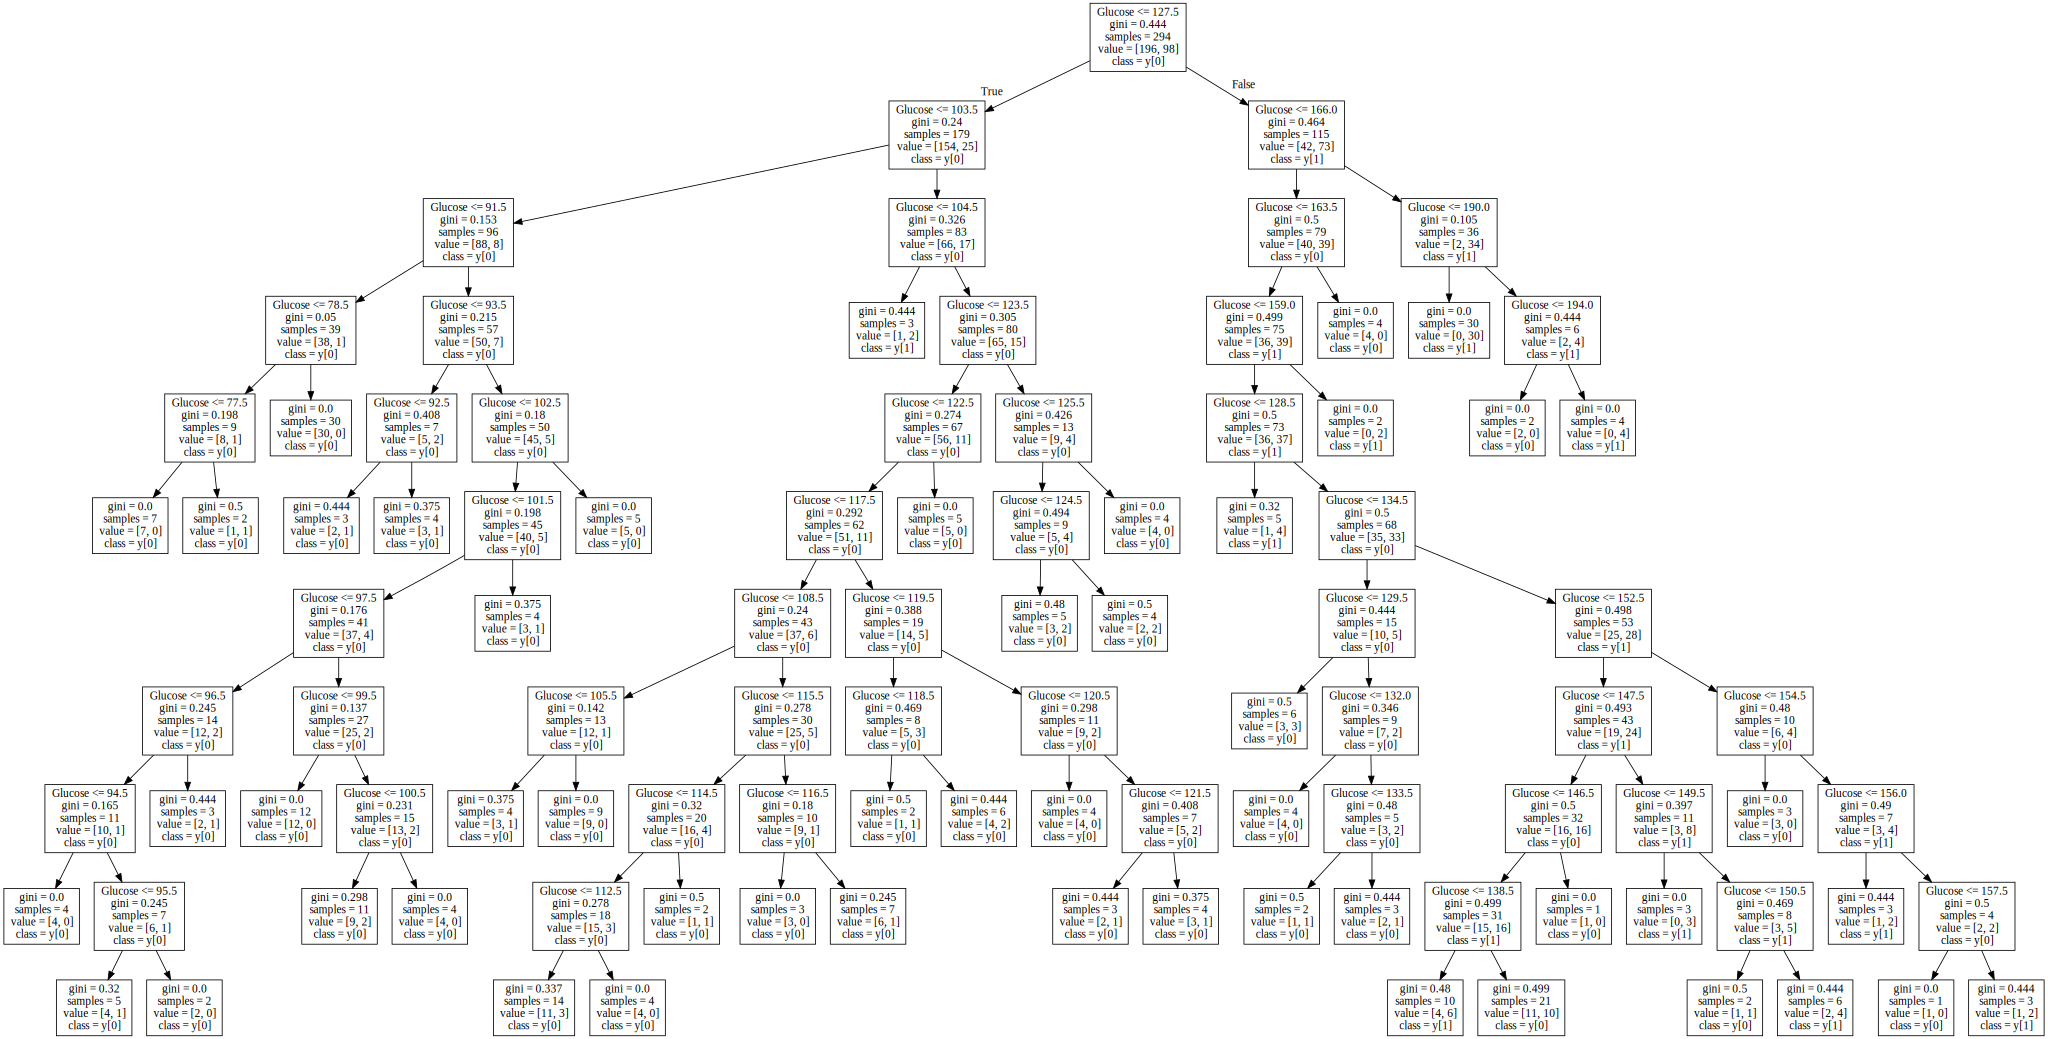

In [150]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns))

### Conclusion

Maximum accuracy score is obtained when only glucose is used to train the model. The corresponding maximum depth = 10. From the confusion matrix shown above, we can see that although our model shows good sensitivity, the specificity is low. 

## General Conclusion

Both Logistic Regression and Decision Tree classification models are able to yield the maximum accuracy score of 0.806. Conversely, the maximum accuracy score yielded by the KNN model is only 0.765. For the Logistic Regression model, the minimum number of features used to yield the maximum accuracy score is 4, and the features included are glucose, age, insulin and BMI. For the Decision Tree Classification Model, only 1 feature, glucose, was used to obtain the maximum accuracy score. The model had a maximum-depth of 10. For the KNN classification model, the corresponding maximum accuracy score was obtained when 2 features - glucose and age were used to train the model. Maximum accuracy was obtained when k number of neighbours = 13 when these 2 features were used. 
<br><br>
For all 3 of the classifiers, the models that yielded the maximum accuracy has good sensitivity as well. However, the specificity of our models are low. This could be attributed to the large imbalance in number of observations for each outcome. To overcome this problem, we used oversampling to equalize the number of observations in each outcome in our subsequent models. Please refer to the other Jupyter notebook to see our observations. 